In [1]:
"https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/netflix.csv"

'https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/netflix.csv'

# Word Counting

## Skills

1. Tokenize data using the tidytext module.
2. Cleanse text data.
2. Analyze a document using its most frequent words.
4. Compare paired documents using relative frequencies.


## Loading Libraries

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import tidytext

In [6]:
import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bskopyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# For making word clouds (unsurprisingly)
from wordcloud import WordCloud, STOPWORDS

In [9]:
import numpy as np

# Word Counting

## Processing and Word Counting

<div style="text-align:center;"><img src="https://images-na.ssl-images-amazon.com/images/I/91QclGg4BjL.jpg" height="250" width="155">&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/210120-D-WD757-2714_%2850861221216%29.jpg/320px-210120-D-WD757-2714_%2850861221216%29.jpg"></div>

Below is the poem "The Hill We Climb" by Amanda Gorman, youth poet laureate of the U.S. from 2017-2018.

In [10]:
text = text = """When day comes, we ask ourselves, where can we find light in this never-ending shade?
The loss we carry. A sea we must wade.
We braved the belly of the beast.
We've learned that quiet isn't always peace, and the norms and notions of what “just” is isn't always justice.
And yet the dawn is ours before we knew it.
Somehow we do it.
Somehow we weathered and witnessed a nation that isn't broken, but simply unfinished.
We, the successors of a country and a time where a skinny Black girl descended from slaves and raised by a single mother can dream of becoming president, only to find herself reciting for one.
And, yes, we are far from polished, far from pristine, but that doesn't mean we are striving to form a union that is perfect.
We are striving to forge our union with purpose.
To compose a country committed to all cultures, colors, characters and conditions of man.
And so we lift our gaze, not to what stands between us, but what stands before us.
We close the divide because we know to put our future first, we must first put our differences aside.
We lay down our arms so we can reach out our arms to one another.
We seek harm to none and harmony for all.
Let the globe, if nothing else, say this is true.
That even as we grieved, we grew.
That even as we hurt, we hoped.
That even as we tired, we tried.
That we'll forever be tied together, victorious.
Not because we will never again know defeat, but because we will never again sow division.
Scripture tells us to envision that everyone shall sit under their own vine and fig tree, and no one shall make them afraid.
If we're to live up to our own time, then victory won't lie in the blade, but in all the bridges we've made.
That is the promise to glade, the hill we climb, if only we dare.
It's because being American is more than a pride we inherit.
It's the past we step into and how we repair it.
We've seen a force that would shatter our nation, rather than share it.
Would destroy our country if it meant delaying democracy.
And this effort very nearly succeeded.
But while democracy can be periodically delayed, it can never be permanently defeated.
In this truth, in this faith we trust, for while we have our eyes on the future, history has its eyes on us.
This is the era of just redemption.
We feared at its inception.
We did not feel prepared to be the heirs of such a terrifying hour.
But within it we found the power to author a new chapter, to offer hope and laughter to ourselves.
So, while once we asked, how could we possibly prevail over catastrophe, now we assert, how could catastrophe possibly prevail over us?
We will not march back to what was, but move to what shall be: a country that is bruised but whole, benevolent but bold, fierce and free.
We will not be turned around or interrupted by intimidation because we know our inaction and inertia will be the inheritance of the next generation, become the future.
Our blunders become their burdens.
But one thing is certain.
If we merge mercy with might, and might with right, then love becomes our legacy and change our children's birthright.
So let us leave behind a country better than the one we were left.
Every breath from my bronze-pounded chest, we will raise this wounded world into a wondrous one.
We will rise from the golden hills of the West.
We will rise from the windswept Northeast where our forefathers first realized revolution.
We will rise from the lake-rimmed cities of the Midwestern states.
We will rise from the sun-baked South.
We will rebuild, reconcile, and recover.
And every known nook of our nation and every corner called our country, our people diverse and beautiful, will emerge battered and beautiful.
When day comes, we step out of the shade of flame and unafraid.
The new dawn balloons as we free it.
For there is always light, if only we're brave enough to see it.
If only we're brave enough to be it."""

We can take this text and put it into a dataframe.

This is sort of an awkward way to do it, since it's just a single entry. Creating a DataFrame directly requires that you give it a list (or list of lists) and a list of the column names.

Soon enough we'll be working with more text in CSV files, and won't have to worry about this so much.

In [11]:
df = pd.DataFrame([text], columns=["text"])

In [12]:
df

,text
0,"When day comes, we ask ourselves, where can we..."


We can use the tidytext package's `unnest_tokens()` function to tokenize the text's dataframe into one word per row in the dataframe. The three arguments to the functions are:
* The DataFrame with the text to tokenize
* The name of the column that words will go in
* The name of the column that contains the text to tokenize

In [13]:
word_df = tidytext.unnest_tokens(df, "word", "text")
word_df.head()

,word
0,when
0,day
0,comes
0,we
0,ask


From here, we can count the words and visualize the most common ones. Let's do that together.

In [14]:
word_df["word"].value_counts()

word
we           53
the          29
and          25
to           21
our          18
             ..
scripture     1
tells         1
envision      1
everyone      1
see           1
Name: count, Length: 336, dtype: int64

Notice anything unusual? How can we fix this?

In [15]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [16]:
word_df = word_df.loc[ ~word_df["word"].isin(STOPWORDS) ]
# Or with query
# word_df = word_df.query("word not in @STOPWORDS")

In [17]:
top10 = word_df["word"].value_counts()[0:10]
top10

word
will       12
one         6
country     6
us          6
rise        4
first       3
nation      3
always      3
every       3
isnt        3
Name: count, dtype: int64

<Axes: xlabel='word', ylabel='count'>

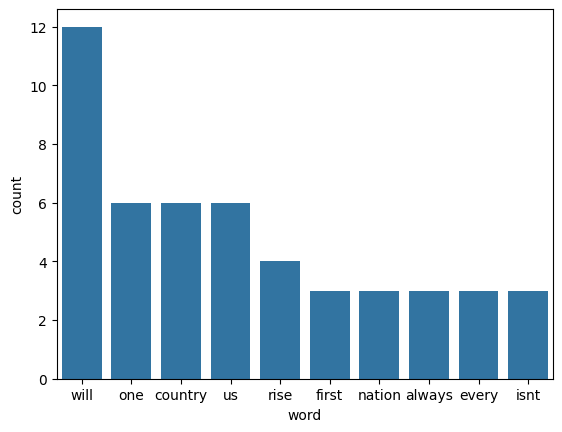

In [18]:
sns.barplot(x=top10.index, y=top10)

## Word Clouds

Word clouds are a fun way to visualize the most common words in a dataset. The [WordCloud package](https://amueller.github.io/word_cloud/) provides a number of functions for making pretty images, with lots of customization.

Here's a basic word cloud. Note that the package requires a String as an input, not a DataFrame, so we first convert our cleaned and tokenized DataFrame back into a String.

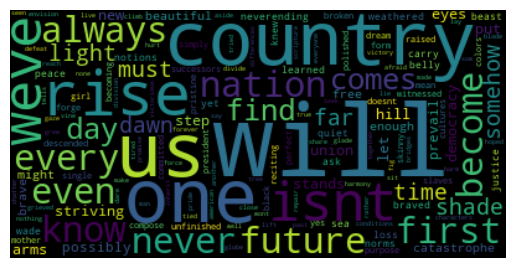

In [19]:
newtext = " ".join(word_df["word"])

# I copied all of this from the WordCloud documentation.
# See the link above for options about shape, color, number of words, and so on.
cloud = WordCloud().generate(newtext)
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Intermezzo

Take some time to try one of the following challenges:
1. Insert a different poem or short story that you enjoy (you can just copy and paste it into the cell above), and look at its top words or make a word cloud. What can you learn from this?
2. Analyze the text of the novel *Black Amazon of Mars* by [Leigh Brackett](https://en.wikipedia.org/wiki/Leigh_Brackett), which I picked because I'm guessing you haven't read it. I grabbed this off of Project Gutenberg's website. You can load the text into a string (called `text`) using the following code:

In [20]:
import requests

text = requests.get("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/black%20amazon%20of%20mars.txt").text

# Relative Counts

In the first half, we considered a single text, and looked at the word counts. Here, we're going to compare the counts in two different documents (or two groups of documents), and look where words are more common. Some questions we may be interested in:

* If we compare the works of two authors (artists, poets, ...), how do their vocabularies differ?
* How do the words used in positive product reviews differ from negative product reviews?
* Are certain words more common in one music genre over another?
* *How are decriptions of Netflix movies and TV shows different? Are some words more common in one or the other?*

This last one is what we'll be investigating today. We'll do that by breaking the word counts into two groupings, then a bit of data manipulation and some data visualization.

### Frequencies vs. Counts

Today, we're going to be more interested in the frequency that a word shows up, rather than its raw counts. So, for example, I care whether a word shows up once every 100 words rather than it appearing in a document 5 times. Why? Because a longer document will naturally have more words in it, so to compare between documents we need to take that into account. So, instead of the raw counts, we'll calculate the *text frequency*:

$$TF = \text{text frequency} = \frac{\text{\# of times }word\text{ appears in a document}}{\text{total words in the document}}$$

Luckily, pandas does this for us when we add call `.count_values()` with the argument `normalize=True`. We then will calculate the relative frequency between two documents:

$$RF = \text{relative frequency} = \frac{TF \text{ document 1}}{TF \text{ document 2}}$$

### Log Ratio

Finally, we'll be taking a logarithm of these. Why? Because we want a $RF$ of $1/4$ to appear the same on a graph as a $RF$ of $4/1$: both represent a 4-to-1 ratio, it just depends on which document has more counts. Here is a visualization of several different ratios without transformation (left) and a log transformation (right):

<div style="text-align:center;"><img src="https://imgur.com/BxEAbMo.png"> <img src="https://imgur.com/59HkS1M.png"></div>

### Processing the Input

Let's load a dataset into a dataframe.

In [21]:
netflix = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/netflix.csv")
netflix.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


Instead of one string, this is a dataframe with many strings, which simplifies things significantly.

In [22]:
df = tidytext.unnest_tokens(netflix, "word", "description")

For relative word counts, we'll just be looking at some binary category. Here, we'll use type, since it has two values: "SHOW" and "MOVIE", but we could also look at media released before and after 2000, or one with "TV-MA" and "R" ratings versus others. To simplify things, I'm going to throw out all columns except that category and the words.

In [23]:
df = df[["type", "word"]]

df.head(100)

,type,word
0,SHOW,this
0,SHOW,collection
0,SHOW,includes
0,SHOW,12
0,SHOW,world
...,...,...
2,MOVIE,way
2,MOVIE,arthur
2,MOVIE,battles
2,MOVIE,the


### Word Counting
First, we remove stop words:

In [24]:
clean_words = df.loc[ ~df["word"].isin(STOPWORDS) ]

Then count them, just as we did before (after some grouping)

In [25]:
counts = clean_words.groupby("type")["word"].value_counts(normalize=True)

A quick inspection of the `counts` variable shows that there's some extremely rare text that we...probably don't want to keep. Let's remove anything with a very low frequency.

In [26]:
counts

type   word     
MOVIE  life         0.006755
       ’            0.004893
       love         0.004757
       one          0.004609
       family       0.004541
                      ...   
SHOW   lopezs       0.000022
       loopholes    0.000022
       loop         0.000022
       loola        0.000022
       competent    0.000022
Name: proportion, Length: 30674, dtype: float64

In [27]:
# keep anything with a count > 0.0005
counts = counts[counts > 0.0005]

...and then convert it back to a dataframe.

In [28]:
counts.name = "text_freq"
counts = counts.reset_index()

In [29]:
counts.head()

,type,word,text_freq
0,MOVIE,life,0.006755
1,MOVIE,’,0.004893
2,MOVIE,love,0.004757
3,MOVIE,one,0.004609
4,MOVIE,family,0.004541


### Relative Frequency

This requires us to use one function that I haven't shown you: `DataFrame.pivot()`. It will let us directly compare the movie and TV show entries. Some [hopefully helpful documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html) can be found here.

In [30]:
counts = counts.pivot(index='word', columns='type', values='text_freq')
counts = counts.reset_index()

In [31]:
counts.head()

type,word,MOVIE,SHOW
0,across,0.000511,0.000556
1,adventure,0.000636,0.000734
2,adventures,NaN,0.001602
3,ago,NaN,0.000667
4,along,0.000647,0.000667


Then we fill in all the NAs with something below the minimum value for that type of media.

In [32]:
counts.loc[counts["MOVIE"].isna(), "MOVIE"] = counts["MOVIE"].min()/2
counts.loc[counts["SHOW"].isna(), "SHOW"]  = counts["SHOW"].min()/2

And calculate the movie/show word ratio, then a $\log($ratio$)$

In [33]:
# column ratio should be the TF for MOVIE divided by TF for SHOW
counts["ratio"] = counts["MOVIE"]/counts["SHOW"]
counts["logratio"] = np.log10(counts["ratio"])

And finally, sort, so that we can see the words most strongly associated with movies and TV shows.

In [34]:
counts = counts.sort_values("logratio", ascending=True)

### Visualization

Now we've got a sorted DataFrame, which we can simply use to make a plot.

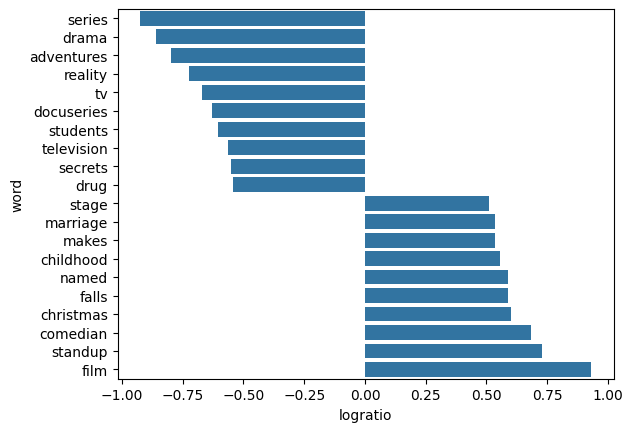

In [35]:
firstlast = pd.concat([  counts[0:10] , counts[-10:]  ])

# What kind of plot should I use?
sns.barplot(data=firstlast, x="logratio", y="word")
plt.show()

What words are most strongly associated with movie descriptions? With TV shows? Why?

### Exercises

Try one of the following challenges:
1. Split the netflix dataset by some other binary feature: rating (make sure to just have two possibilities!), produced before/after some year, or so on.
2. Compare the words used in spam vs real text messages. This is the [link to the dataset](https://github.com/Greg-Hallenbeck/class-datasets/blob/main/datasets/SMSSpamCollection.tsv).
3. Compare the words used in 1 star vs 5 star [reviews of hotels](https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/tripadvisor_hotel_reviews.csv).